In [8]:
#Import  Libraries
import numpy as np                                  
import pandas as pd                                 
import nltk  
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Reviews.csv')
print(df.shape)
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [11]:
#Preprocessing Data Preparation
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [12]:
# assigning labels to helpful according to its value
df['Helpful %'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [13]:
pd.cut(df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

0         80-100%
1             NaN
2         80-100%
3         80-100%
4             NaN
           ...   
568449        NaN
568450        NaN
568451    80-100%
568452    80-100%
568453        NaN
Name: Helpful %, Length: 568454, dtype: category
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [14]:
df['%upvote'] = pd.cut( df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [15]:
df.groupby(['Score', '%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful %  
Score %upvote                                                              
1     Empty                      8060    8060     8060    8060       8060  
      0-20%                      2338    2338     2338    2338       2338  
      20-40%                     4649    4649     4649    4649       4649  
      40-60%                     6586    6586     6586    6586       6586  
      60-80%                     5838    5838     5838    5838       5838  
      80-100%                   12531   12531    12531   12531      12531  
2     Empty                      4234    4234     4234    4234       4234  
      0-20%                       762     762      737     762        762  
      20-40%                     1618    1618     1618    1618       1618  
      40-60%                     3051    3051     3051    3051       3051  
      60-80%                     2486    2486     2486    2486       2486  
      80-100%                    7014    7014     7014    7014       7014  
3     Empty                      5062    5062     5062    5062       5062  
      0-20%                       474     474      474     474        474  
      20-40%                     1506    1506     1506    1506       1506  
      40-60%                     3384    3384     3384    3384       3384  
      60-80%                     2754    2754     2754    2754       2754  
      80-100%                   11037   11037 

In [16]:
#Consider only id column and try to count Total Upvotes for different categories
df.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [17]:
df_s=df.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
df_s

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [18]:
#Pivot Table
df_s.pivot(index='%upvote',columns='Score')

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

Text(0.5, 1.0, 'How helpful users find in user scores')

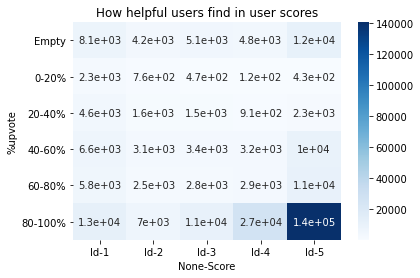

In [19]:
#Create Heatmap
sns.heatmap(df_s.pivot(index='%upvote',columns='Score'),annot=True,cmap = 'Blues')
plt.title('How helpful users find in user scores')

In [20]:
#Reviews are skewed towards positive
#More than half of the reviews are with zero votes
#Many people agree with score 5 reviews
df.shape

(568454, 12)

In [21]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [22]:
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [23]:
df2 = df[df['Score'] != 3]
X = df2['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df2['Score'].map(y_dict)

In [24]:
#Score Prediction : Converting text into vectors using NLP
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')

In [25]:
X_c = c.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y)
print(' Train records: {}'.format(X_train.shape[0]))

 Train records: 394360


In [27]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [28]:
ml =log.fit(X_train, y_train)
acc = ml.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))

Model Accuracy: 0.9357798165137615


C:\Users\krunal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# Fetching Top 20 positive and negative words
w = c.get_feature_names()
w

['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [30]:
coef = ml.coef_.tolist()[0]
coef

[-0.33704320360961176,
 0.18112885392407366,
 0.31968745329543846,
 -0.002093381576616381,
 -0.00924698831562255,
 0.0,
 0.0004372779873144522,
 -0.013742719096337017,
 0.0005137946158648304,
 0.00040667583331700384,
 0.0011862722923053155,
 -0.009772500018492256,
 0.0018360970739827733,
 0.010244035303541517,
 -0.20486368743265795,
 0.001265266150422109,
 0.001967244275431324,
 0.00339979828966429,
 0.0,
 5.98460602265574e-05,
 0.08402555956623828,
 0.015429590833896788,
 0.037596629328663624,
 0.037596629328663624,
 0.037596629328663624,
 0.037596629328663624,
 0.037596629328663624,
 0.037596629328663624,
 0.037596629328663624,
 0.037596629328663624,
 0.037596629328663624,
 -0.000487049574619639,
 0.04050318825863462,
 0.0001596949114075894,
 -0.08200248191335975,
 0.0,
 0.00016145379692817621,
 0.0,
 0.09260941011625246,
 2.8781874845116446e-05,
 -0.09484960165413106,
 0.0,
 0.00012610282993884097,
 0.0051108185450308785,
 0.0,
 0.0,
 0.011527200365187418,
 4.9798985871871966e-05,
 

In [31]:
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df

,Word,Coefficient
0,00,-0.337043
1,000,0.181129
2,0000,0.319687
3,000001,-0.002093
4,00001,-0.009247
...,...,...
114964,çaykur,0.000738
114965,çelem,-0.123022
114966,être,0.016764
114967,île,0.000000


In [32]:
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'],ascending=False)
coeff_df

,Word,Coefficient
80600,pleasantly,3.925658
39072,downside,3.120161
5865,addicting,3.013176
94667,skeptical,2.904332
55029,hooked,2.363728
...,...,...
113164,worst,-3.117291
24949,cancelled,-3.203398
106852,unacceptable,-3.225214
34989,deceptive,-3.487977


In [33]:
print(' Top 20 positive : ')
print(coeff_df.head(20).to_string(index=False))
print('\n')
print(' Top 20 negative : ')        
print(coeff_df.tail(20).to_string(index=False))

 Top 20 positive : 
         Word  Coefficient
   pleasantly     3.925658
     downside     3.120161
    addicting     3.013176
    skeptical     2.904332
       hooked     2.363728
       delish     2.319275
       brings     2.299274
     drawback     2.257021
       resist     2.237954
     soothing     2.231936
      worries     2.231205
       solved     2.203297
      worried     2.169252
 prescription     2.112255
     terrific     2.111294
   economical     2.104844
          met     2.100740
     tastiest     2.092923
    delighted     2.059933
      welcome     2.041739


 Top 20 negative : 
           Word  Coefficient
         ruined    -2.311923
        vomited    -2.327824
        sounded    -2.367321
          ruins    -2.400135
 disappointment    -2.400491
        defeats    -2.435765
    embarrassed    -2.439261
     unbearable    -2.459863
         lacked    -2.541071
          lousy    -2.680086
  disappointing    -2.868609
    disapointed    -2.878781
         ripof

In [34]:
def text_fit(X, y, nlp_model,ml_model,coef_show=1):
    
    X_c = nlp_model.fit_transform(X)
    print('Features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' Train Records: {}'.format(X_train.shape[0]))
    print(' Test Records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = nlp_model.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('\n')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression

In [36]:
text_fit(X, y, c, LogisticRegression())

Features: 114969
 Train Records: 394360
 Test Records: 131454


C:\Users\krunal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.9368752567438039


-Top 20 positive-
       Word  Coefficient
 pleasantly     4.090515
   downside     3.426465
  addicting     3.196123
  skeptical     2.911128
     resist     2.503607
       whim     2.426508
     delish     2.405479
 economical     2.313328
   drawback     2.282097
    welcome     2.256958
     hooked     2.182168
    worries     2.135262
        met     2.114853
  excellent     2.097483
     divine     2.094611
      penny     2.066820
   soothing     2.062972
   terrific     2.036634
  delighted     2.035123
   hesitant     2.022246


-Top 20 negative-
           Word  Coefficient
         choked    -2.324502
 disappointment    -2.410638
         lacked    -2.454394
    unappealing    -2.467118
    embarrassed    -2.475522
        vomited    -2.499476
         bummer    -2.505330
    disapointed    -2.623995
     overpowers    -2.667282
        defeats    -2.687446
         ruined    -2.697494
       mediocre    -2.808909
  disappointing    -2.9

In [37]:
#Predicting Function
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X, y, nlp_model,ml_model):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    predictions=ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [39]:
predict(X,y,c,lr)

features: 114969
 train records: 394360
 test records: 131454


C:\Users\krunal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 14932   2791]
 [  5655 108076]]
0.9357493876184825


In [40]:
from sklearn.dummy import DummyClassifier
text_fit(X, y, c, DummyClassifier(),0)

Features: 114969
 Train Records: 394360
 Test Records: 131454
Model Accuracy: 0.8440138755762472


In [41]:
#Logistic regression model on TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

Features: 114969
 Train Records: 394360
 Test Records: 131454


C:\Users\krunal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.9347300196266375


-Top 20 positive-
       Word  Coefficient
      great    13.882491
  delicious    12.495805
       best    11.714187
    perfect    10.743917
  excellent    10.013246
      loves     9.407429
     highly     9.053183
  wonderful     8.483233
       love     8.477449
    amazing     7.721392
       good     7.554882
    awesome     7.435135
 pleasantly     7.330720
     hooked     7.260051
    pleased     6.961799
   favorite     6.881251
      yummy     6.856671
       nice     6.827061
       glad     6.749942
     smooth     6.548430


-Top 20 negative-
           Word  Coefficient
          waste    -5.675575
         ruined    -5.751684
    undrinkable    -5.849359
          stale    -6.012558
          worse    -6.049025
           yuck    -6.155058
      tasteless    -6.495472
          bland    -6.546139
           weak    -6.694135
          threw    -6.715225
         return    -6.726139
     disgusting    -6.746747
       horrible    -7.8

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
predict(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
[[ 14163   2280]
 [  6326 108685]]
0.9345322318073243


C:\Users\krunal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
#Accurany is roughly the same - 93.5%. 
#However we notice that the significant words make much more sense now, with higher coefficient magnitude as well!

In [44]:
#Upvote prediction
#We will be focusing on score 5 reviews, and get rid of comments with neutral votes
data = df[df['Score'] == 5]

In [45]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful %', '%upvote'],
      dtype='object')

In [46]:
data2 = data[data['%upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data2.shape

(154428, 12)

In [47]:
X = data2['Text']

In [48]:
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data2['%upvote'].map(y_dict)

In [49]:
print(y.value_counts())

1.0    151721
0.0      2707
Name: %upvote, dtype: int64


In [50]:
#The target class 'y' is highly skewed , we will observe positive upvotes are too much higher than negative ones.
#Resampling to get balanced data:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [51]:
X_c=tf.fit_transform(X)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)

In [53]:
y_test.value_counts()

1.0    45515
0.0      814
Name: %upvote, dtype: int64

In [62]:
# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()

In [63]:
X_train_res, y_train_res = os.fit_sample(X_c, y)

In [64]:
X_train_res.shape,y_train_res.shape

((303442, 67507), (303442,))

In [65]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Resampled dataset shape Counter({1.0: 151721, 0.0: 151721})


In [66]:
from sklearn.linear_model import LogisticRegression
log_class=LogisticRegression()

In [67]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [68]:
import numpy as np
from sklearn.model_selection import GridSearchCV

clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_res,y_train_res)

C:\Users\krunal\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.78365948        nan 0.88051419        nan 0.95469765
        nan 0.97749438        nan 0.98411165]
  warnings.warn(
C:\Users\krunal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [69]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  814     0]
 [  586 44929]]
0.987351335016944


In [ ]:
#Finally, we get 98% accuracy!